# Task 1
## 2

Next, take the two well-known datasets: Fashion MNIST (introduced in Ch 10, p.  298) and CIFAR-10.The first dataset contains 2D (grayscale) images of size 28x28, split into 10 categories; 60,000 images for training  and  10,000  for  testing,  while  the  latter  contains  32x32x3  RGB  images  (50,000/10,000train/test). Apply two reference networks on the fashion MNIST dataset

### a
A multi-layer perceptron

In [3]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Loading the data
fashion_mnist = keras.datasets.fashion_mnist

In [11]:
# Creating the train and test sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape  # This is usefull to know for the input_shape of the weight matrix of the model as 
                    # it depends on the number of inputs

# Normalising the pixel values to the range [0, 1]
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# Creating a validation set of 10%
validation_size = int(0.1 * len(X_train_full))

X_valid, X_train = X_train_full[:validation_size], X_train_full[validation_size:]
y_valid, y_train = y_train_full[:validation_size], y_train_full[validation_size:]


In [15]:
# Setting the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Now lets build the network <br>
MLP with 2 hidden layers

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28])) # we know the input shape from earlier
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\hsuik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary() # overview of model and its layers

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# sparse_categorical_crossentropy: we have sparse labels (0 to 9) and the are exclusive
# sgd: =keras.optimiz ers.SGD(lr=???)
# accuracy: we want to compare the accuracies of different models

Now train the model on the data

In [20]:
history = model.fit(X_train, y_train, epochs=30, # epochs = 30 because ...
                    validation_data=(X_valid, y_valid)) 

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6899 - loss: 0.9919 - val_accuracy: 0.8278 - val_loss: 0.5144
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8239 - loss: 0.5052 - val_accuracy: 0.8213 - val_loss: 0.4938
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8436 - loss: 0.4464 - val_accuracy: 0.8570 - val_loss: 0.4205
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8517 - loss: 0.4240 - val_accuracy: 0.8490 - val_loss: 0.4362
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8617 - loss: 0.3963 - val_accuracy: 0.8653 - val_loss: 0.3856
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8652 - loss: 0.3805 - val_accuracy: 0.8578 - val_loss: 0.3980
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8695 - loss: 0.3713 - val_accuracy: 0.8717 - val_loss: 0.3698
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8753 - loss: 0.3511 - 

Plotting the accuracy and loss per epoch

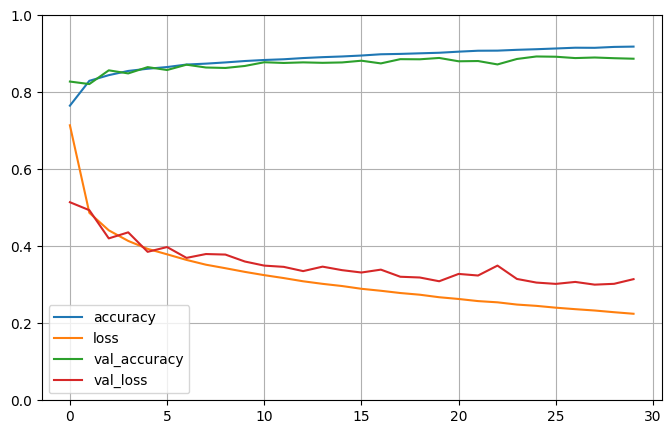

In [21]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Loss and accuracy on the test set:

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3390986919403076
Test accuracy: 0.8830999732017517
